In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
BASE_FOLDER = '/home/mog29/compgen_data/continual_learning'

def num_examples(treatment, curr_round, task):
    total = 0
    if treatment in ['baseline', 'no_ds']:
        data_path = os.path.join(BASE_FOLDER, f'cl_r{curr_round}_{treatment}_{task}.json')
        with open(data_path, 'r') as f:
            data = json.load(f)
        for game_id, game_dict in data.items():
            total += len(game_dict)
    else:
        data_path = os.path.join(BASE_FOLDER, f'cl_r{curr_round}_{treatment}_all.json')
        with open(data_path, 'r') as f:
            data = json.load(f)
        for game_id, game_dict in data.items():
            if task in game_id:
                total += len(game_dict)
            else:
                for round_idx, round_dict in game_dict.items():
                    if round_dict['reward'] == 1:
                        total += 1

    return total

In [12]:
# For each round: How many comprehension examples (cumulatively) did we have?
TREATMENTS = ['full', 'no_ji', 'no_ds', 'baseline']
comp_values = {treatment : [] for treatment in TREATMENTS}

task = 'listener'
for treatment in TREATMENTS:
    for deployment_round in range(1, 5):
        total_datapoints = 104
        for past_round in range(1, deployment_round):
            total_datapoints += num_examples(treatment, past_round, task)
        comp_values[treatment].append(total_datapoints)

    print(treatment, comp_values[treatment])

full [104, 3138, 7331, 12578]
no_ji [104, 3071, 7074, 12052]
no_ds [104, 2098, 4594, 7592]
baseline [104, 2102, 4601, 7596]


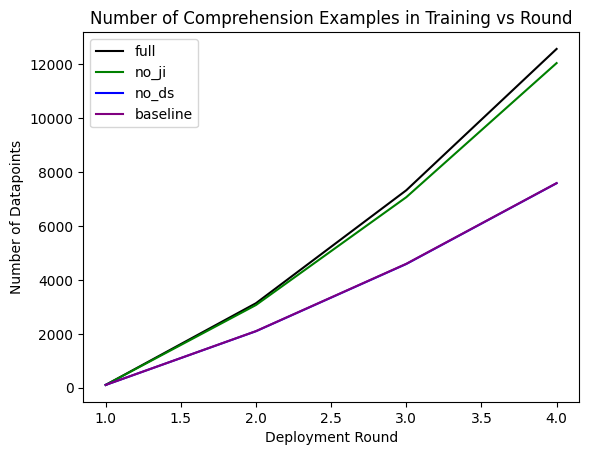

In [14]:
plt.title('Number of Comprehension Examples in Training vs Round')
plt.xlabel('Deployment Round')
plt.ylabel('Number of Datapoints')

treatment_to_color = {
    'full' : 'black', 'no_ji' : 'green', 'no_ds' : 'blue', 'baseline' : 'purple', 'human' : 'orange'
}

for treatment in TREATMENTS:
    x = list(range(1, 5))
    color = treatment_to_color[treatment]
    plt.plot(x, comp_values[treatment], label=treatment, color=color)

plt.legend()
plt.show()

In [13]:
# For each round: How many comprehension examples (cumulatively) did we have?
TREATMENTS = ['full', 'no_ji', 'no_ds', 'baseline']
gen_values = {treatment : [] for treatment in TREATMENTS}

task = 'speaker'
for treatment in TREATMENTS:
    for deployment_round in range(1, 5):
        total_datapoints = 104
        for past_round in range(1, deployment_round):
            total_datapoints += num_examples(treatment, past_round, task)
        gen_values[treatment].append(total_datapoints)

    print(treatment, gen_values[treatment])

full [104, 3167, 7295, 12352]
no_ji [104, 2956, 6810, 11655]
no_ds [104, 2104, 4603, 7603]
baseline [104, 2104, 4604, 7604]


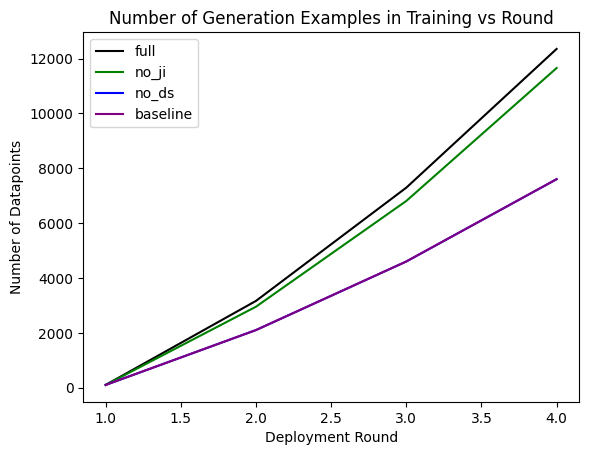

In [15]:
plt.title('Number of Generation Examples in Training vs Round')
plt.xlabel('Deployment Round')
plt.ylabel('Number of Datapoints')

treatment_to_color = {
    'full' : 'black', 'no_ji' : 'green', 'no_ds' : 'blue', 'baseline' : 'purple', 'human' : 'orange'
}

for treatment in TREATMENTS:
    x = list(range(1, 5))
    color = treatment_to_color[treatment]
    plt.plot(x, gen_values[treatment], label=treatment, color=color)

plt.legend()
plt.show()